In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.7f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [26]:
# whole data
obesity_whole_data = pd.read_csv('D:/CASA0007-qm/assignment/whole_data.csv',low_memory=False)
obesity_whole_data.info()
obesity_whole_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tenyear_ratio_change         152 non-null    float64
 1   former_fiveyear_ratiochange  152 non-null    float64
 2   later_fiveyear_ratiochange   152 non-null    float64
 3   air_budget_permillion        152 non-null    float64
 4   enviro_budget_permillion     152 non-null    float64
 5   health_budget_permillion     152 non-null    float64
 6   school_budget_permillion     152 non-null    float64
 7   media_budget_permillion      152 non-null    float64
 8   sub_budget_permillion        152 non-null    float64
 9   DGP_perhead                  152 non-null    int64  
 10  region                       152 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 13.2+ KB


,tenyear_ratio_change,former_fiveyear_ratiochange,later_fiveyear_ratiochange,air_budget_permillion,enviro_budget_permillion,health_budget_permillion,school_budget_permillion,media_budget_permillion,sub_budget_permillion,DGP_perhead,region
0,0.0000740,0.0000168,0.0000572,29.6040459,22.2030344,14.8020229,49.3400765,4.9340076,2.4670038,7881451,London
1,-0.0002916,0.0002643,-0.0005560,7.7606010,2.2825297,3.6520475,6.3910832,2.2825297,0.9130119,22232,East_Around_London
2,0.0002498,0.0001235,0.0001262,4.3237235,1.6360035,0.8180017,1.9865757,0.8180017,0.8180017,17982,North_East
3,0.0005462,0.0001694,0.0003768,3.3038442,2.3598887,0.8495599,0.3775822,1.2271421,0.3775822,46706,East_Around_London
4,0.0002371,0.0001420,0.0000951,2.3397342,1.5095060,0.5283271,1.5849813,0.7547530,0.7547530,36023,North_West


In [5]:
# 1.later_five years obesity ratio change
obesity_fiveyearratio = pd.read_csv('D:/CASA0007-qm/assignment/gdp_region_budgetfiveyear.csv',low_memory=False)
obesity_fiveyearratio.info()
obesity_fiveyearratio.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   later_fiveyear_ratiochange  152 non-null    float64
 1   air_budget_permillion       152 non-null    float64
 2   enviro_budget_permillion    152 non-null    float64
 3   health_budget_permillion    152 non-null    float64
 4   school_budget_permillion    152 non-null    float64
 5   media_budget_permillion     152 non-null    float64
 6   sub_budget_permillion       152 non-null    float64
 7   DGP_perhead                 152 non-null    int64  
 8   region                      152 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 10.8+ KB


,later_fiveyear_ratiochange,air_budget_permillion,enviro_budget_permillion,health_budget_permillion,school_budget_permillion,media_budget_permillion,sub_budget_permillion,DGP_perhead,region
0,0.0012201,0.0000000,0.0000000,0.0000000,409.8360656,0.0000000,0.0000000,37421,South_West
1,-0.0000843,0.0554210,0.7960466,0.0554210,0.6297837,0.1461098,0.2317604,26113,South_West
2,0.0002716,0.0708866,0.3012680,0.1439884,0.1395579,0.1550644,0.1096527,26349,West_Midlands
3,0.0001040,0.1145167,0.1549343,0.0747114,0.1628954,0.1243149,0.0545026,34575,East_Around_London
4,0.0001869,0.1291770,0.9246357,0.3467384,0.4691166,0.2311589,0.1427746,20281,Yorkshire_and_the_Humber


In [6]:
obesity_fiveyearratio_numeric = pd.get_dummies(obesity_fiveyearratio)
obesity_fiveyearratio_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   later_fiveyear_ratiochange       152 non-null    float64
 1   air_budget_permillion            152 non-null    float64
 2   enviro_budget_permillion         152 non-null    float64
 3   health_budget_permillion         152 non-null    float64
 4   school_budget_permillion         152 non-null    float64
 5   media_budget_permillion          152 non-null    float64
 6   sub_budget_permillion            152 non-null    float64
 7   DGP_perhead                      152 non-null    int64  
 8   region_East_Around_London        152 non-null    uint8  
 9   region_London                    152 non-null    uint8  
 10  region_North_East                152 non-null    uint8  
 11  region_North_West                152 non-null    uint8  
 12  region_South_West     

In [7]:
obesity_ratio_final = obesity_fiveyearratio_numeric.drop(['region_East_Around_London','air_budget_permillion'], axis=1)

obesity_ratio_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   later_fiveyear_ratiochange       152 non-null    float64
 1   enviro_budget_permillion         152 non-null    float64
 2   health_budget_permillion         152 non-null    float64
 3   school_budget_permillion         152 non-null    float64
 4   media_budget_permillion          152 non-null    float64
 5   sub_budget_permillion            152 non-null    float64
 6   DGP_perhead                      152 non-null    int64  
 7   region_London                    152 non-null    uint8  
 8   region_North_East                152 non-null    uint8  
 9   region_North_West                152 non-null    uint8  
 10  region_South_West                152 non-null    uint8  
 11  region_West_Midlands             152 non-null    uint8  
 12  region_Yorkshire_and_t

Text(0.5, 1.0, 'Correlation Matrix')

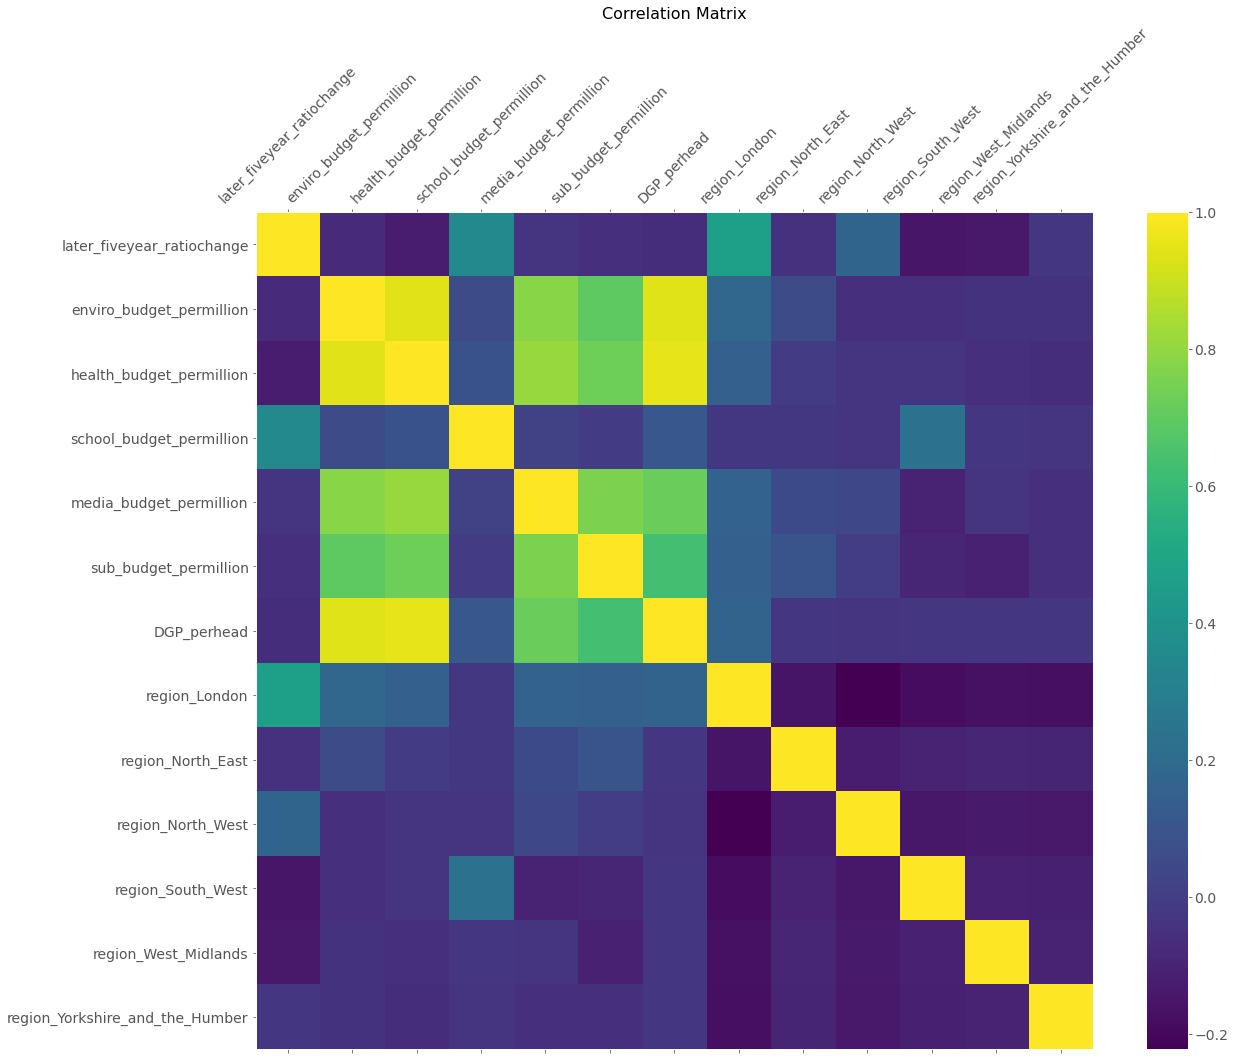

In [8]:
df = obesity_ratio_final
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [12]:
obesity_ratiochange =obesity_fiveyearratio_numeric.loc[:,['later_fiveyear_ratiochange','DGP_perhead','region_East_Around_London','region_London','region_North_East','region_North_West', 'region_South_West', 'region_West_Midlands', 'region_Yorkshire_and_the_Humber','air_budget_permillion','enviro_budget_permillion','health_budget_permillion','school_budget_permillion','media_budget_permillion','sub_budget_permillion']]

In [13]:
obesity_ratiochange.columns

Index(['later_fiveyear_ratiochange', 'DGP_perhead',
       'region_East_Around_London', 'region_London', 'region_North_East',
       'region_North_West', 'region_South_West', 'region_West_Midlands',
       'region_Yorkshire_and_the_Humber', 'air_budget_permillion',
       'enviro_budget_permillion', 'health_budget_permillion',
       'school_budget_permillion', 'media_budget_permillion',
       'sub_budget_permillion'],
      dtype='object')

In [14]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [15]:
df_predictors_selected_VIF = drop_column_using_vif_(obesity_ratiochange.drop('later_fiveyear_ratiochange', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: region_East_Around_London
Dropping: health_budget_permillion
Dropping: air_budget_permillion
Dropping: enviro_budget_permillion
The columns remaining after VIF selection are:
Index(['DGP_perhead', 'region_London', 'region_North_East',
       'region_North_West', 'region_South_West', 'region_West_Midlands',
       'region_Yorkshire_and_the_Humber', 'school_budget_permillion',
       'media_budget_permillion', 'sub_budget_permillion'],
      dtype='object')


C:\Users\79263\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\79263\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [19]:
model_obesiy_ratiofiveyears = sm.OLS(endog=obesity_ratiochange[['later_fiveyear_ratiochange']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_obesiy_ratiofiveyears.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     later_fiveyear_ratiochange   R-squared:                       0.505
Model:                                    OLS   Adj. R-squared:                  0.470
Method:                         Least Squares   F-statistic:                     14.40
Date:                        Mon, 15 Nov 2021   Prob (F-statistic):           2.33e-17
Time:                                04:59:39   Log-Likelihood:                 1118.8
No. Observations:                         152   AIC:                            -2216.
Df Residuals:                             141   BIC:                            -2182.
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0001   3.22e-05      3.916      0.000    6.24e-05       0.000
DGP_perhead                     -5.146e-11   3.07e-11     -1.676      0.096   -1.12e-10    9.24e-12
region_London                       0.0003   3.83e-05      8.671      0.000       0.000       0.000
region_North_East                9.123e-05   5.33e-05      1.713      0.089   -1.41e-05       0.000
region_North_West                   0.0002   4.23e-05      5.049      0.000       0.000       0.000
region_South_West               -4.212e-05   4.86e-05     -0.866      0.388      -0.000     5.4e-05
region_West_Midlands             2.732e-05   5.03e-05      0.544      0.588    -7.2e-05       0.000
region_Yorkshire_and_the_Humber     0.0001   4.86e-05      2.127      0.035    7.31e-06       0.000
school_budget_permillion         2.748e-06   4.05e-07      6.784      0.000    1.95e-06    3.55e-06
media_budget_permillion         -1.311e-05   4.56e-05     -0.288      0.774      -0.000    7.69e-05
sub_budget_permillion           -2.815e-05   7.49e-05     -0.376      0.707      -0.000       0.000
==============================================================================
Omnibus:                       12.250   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.781
Skew:                          -0.450   Prob(JB):                     0.000138
Kurtosis:                       4.413   Cond. No.                     4.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

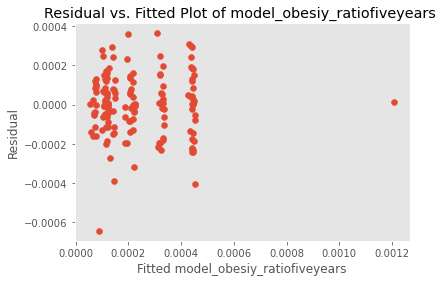

In [20]:
# plot 
plt.scatter(model_obesiy_ratiofiveyears.fittedvalues, model_obesiy_ratiofiveyears.resid)

plt.xlabel('Fitted model_obesiy_ratiofiveyears')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of model_obesiy_ratiofiveyears ')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   former_fiveyear_ratiochange  152 non-null    float64
 1   air_budget_permillion        152 non-null    float64
 2   enviro_budget_permillion     152 non-null    float64
 3   health_budget_permillion     152 non-null    float64
 4   school_budget_permillion     152 non-null    float64
 5   media_budget_permillion      152 non-null    float64
 6   sub_budget_permillion        152 non-null    float64
 7   DGP_perhead                  152 non-null    int64  
 8   region                       152 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 10.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                 

Text(0.5, 1.0, 'Correlation Matrix')

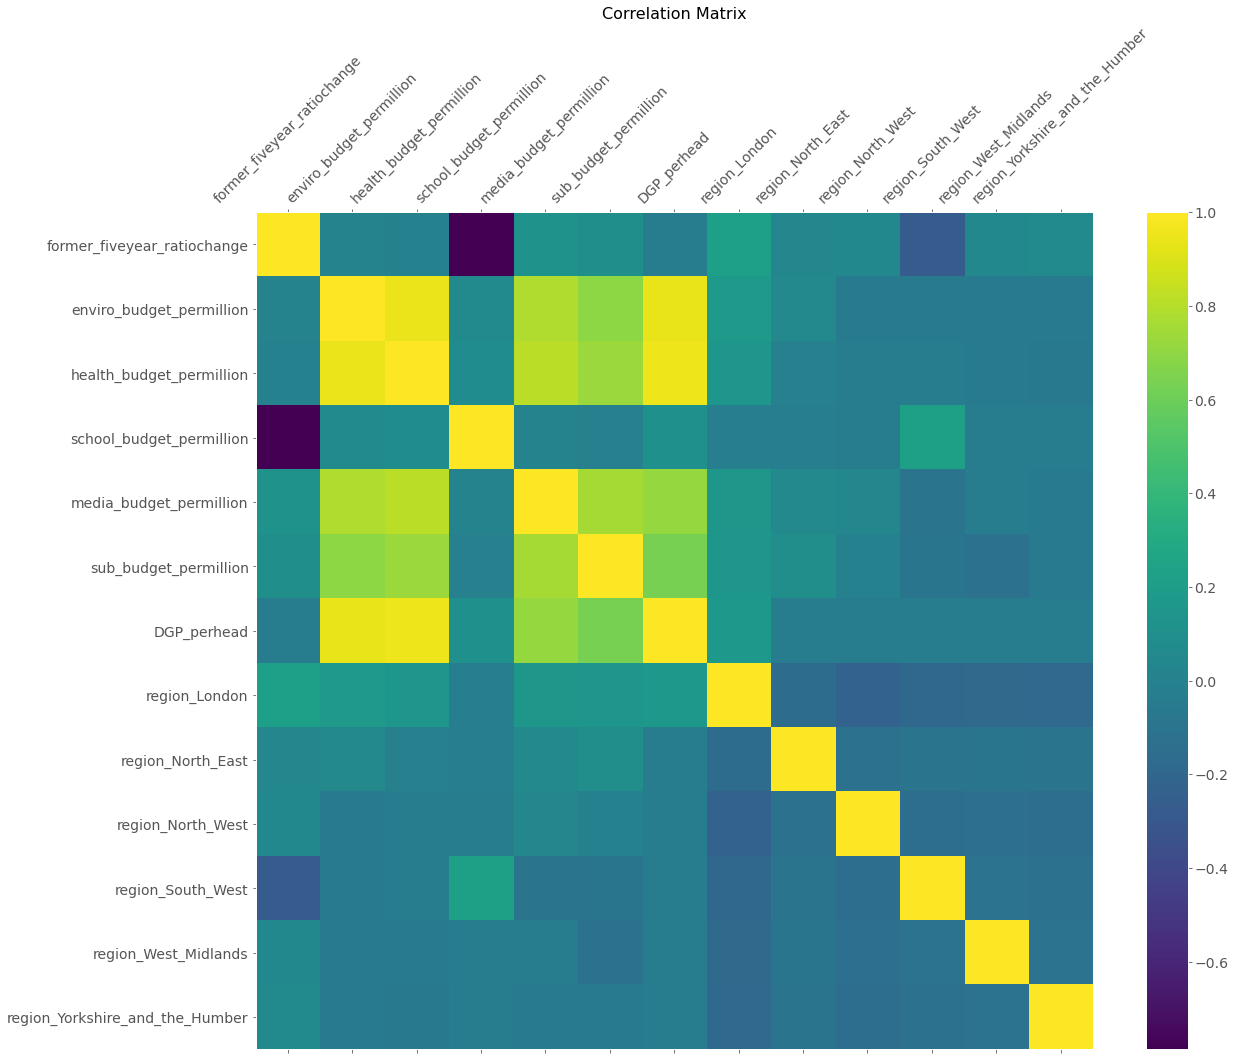

In [22]:
# 2.formerfive years ratio change, cause the R-squared of laterfive years ratiochange:	0.505, not so suiatable.
obesity_fiveyearformer = pd.read_csv('D:/CASA0007-qm/assignment/gdp_region_bud_formerfive.csv',low_memory=False)
obesity_fiveyearformer.info()
obesity_fiveyearformer.head()

obesity_fiveyearformer_numeric = pd.get_dummies(obesity_fiveyearformer)
obesity_fiveyearformer_numeric.info()

obesity_ratio_final = obesity_fiveyearformer_numeric.drop(['region_East_Around_London','air_budget_permillion'], axis=1)

# double check the result
obesity_ratio_final.info()

df = obesity_ratio_final
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [23]:
obesity_ratiochange =obesity_fiveyearformer_numeric.loc[:,['former_fiveyear_ratiochange','DGP_perhead','region_East_Around_London','region_London','region_North_East','region_North_West', 'region_South_West', 'region_West_Midlands', 'region_Yorkshire_and_the_Humber','air_budget_permillion','enviro_budget_permillion','health_budget_permillion','school_budget_permillion','media_budget_permillion','sub_budget_permillion']]
obesity_ratiochange.columns

# using VIF on the bike_rental dataset
df_predictors_selected_VIF = drop_column_using_vif_(obesity_ratiochange.drop('former_fiveyear_ratiochange', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

model_obesiy_ratiofiveformer = sm.OLS(endog=obesity_ratiochange[['former_fiveyear_ratiochange']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_obesiy_ratiofiveformer.summary()

Dropping: region_East_Around_London
Dropping: health_budget_permillion
Dropping: air_budget_permillion
Dropping: enviro_budget_permillion
The columns remaining after VIF selection are:
Index(['DGP_perhead', 'region_London', 'region_North_East',
       'region_North_West', 'region_South_West', 'region_West_Midlands',
       'region_Yorkshire_and_the_Humber', 'school_budget_permillion',
       'media_budget_permillion', 'sub_budget_permillion'],
      dtype='object')


C:\Users\79263\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\79263\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     former_fiveyear_ratiochange   R-squared:                       0.710
Model:                                     OLS   Adj. R-squared:                  0.689
Method:                          Least Squares   F-statistic:                     34.46
Date:                         Mon, 15 Nov 2021   Prob (F-statistic):           4.23e-33
Time:                                 05:02:52   Log-Likelihood:                 1170.7
No. Observations:                          152   AIC:                            -2319.
Df Residuals:                              141   BIC:                            -2286.
Df Model:                                   10                                         
Covariance Type:                     nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            2.866e-05   2.29e-05      1.252      0.213   -1.66e-05    7.39e-05
DGP_perhead                     -3.351e-11   2.18e-11     -1.535      0.127   -7.67e-11    9.64e-12
region_London                       0.0001   2.72e-05      5.376      0.000    9.25e-05       0.000
region_North_East                 7.77e-05   3.79e-05      2.053      0.042    2.86e-06       0.000
region_North_West                7.498e-05   3.01e-05      2.491      0.014    1.55e-05       0.000
region_South_West                2.483e-05   3.46e-05      0.719      0.474   -4.35e-05    9.32e-05
region_West_Midlands              8.67e-05   3.57e-05      2.427      0.016    1.61e-05       0.000
region_Yorkshire_and_the_Humber     0.0001   3.45e-05      2.960      0.004    3.39e-05       0.000
school_budget_permillion        -4.657e-06   2.88e-07    -16.170      0.000   -5.23e-06   -4.09e-06
media_budget_permillion          6.318e-05   3.24e-05      1.951      0.053   -8.42e-07       0.000
sub_budget_permillion            9.892e-06   5.32e-05      0.186      0.853   -9.53e-05       0.000
==============================================================================
Omnibus:                        0.143   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.304
Skew:                          -0.017   Prob(JB):                        0.859
Kurtosis:                       2.783   Cond. No.                     4.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

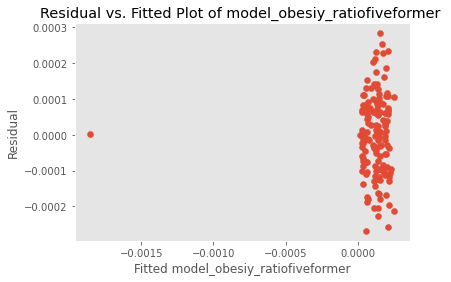

In [24]:
plt.scatter(model_obesiy_ratiofiveformer.fittedvalues, model_obesiy_ratiofiveformer.resid)
# adding title and labels
plt.xlabel('Fitted model_obesiy_ratiofiveformer')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of model_obesiy_ratiofiveformer ')
plt.show()
# comparing the former five years and later five years, the former five years is more relavant. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tenyear_ratio_change      152 non-null    float64
 1   air_budget_permillion     152 non-null    float64
 2   enviro_budget_permillion  152 non-null    float64
 3   health_budget_permillion  152 non-null    float64
 4   school_budget_permillion  152 non-null    float64
 5   media_budget_permillion   152 non-null    float64
 6   sub_budget_permillion     152 non-null    float64
 7   DGP_perhead               152 non-null    int64  
 8   region                    152 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 10.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  

Text(0.5, 1.0, 'Correlation Matrix')

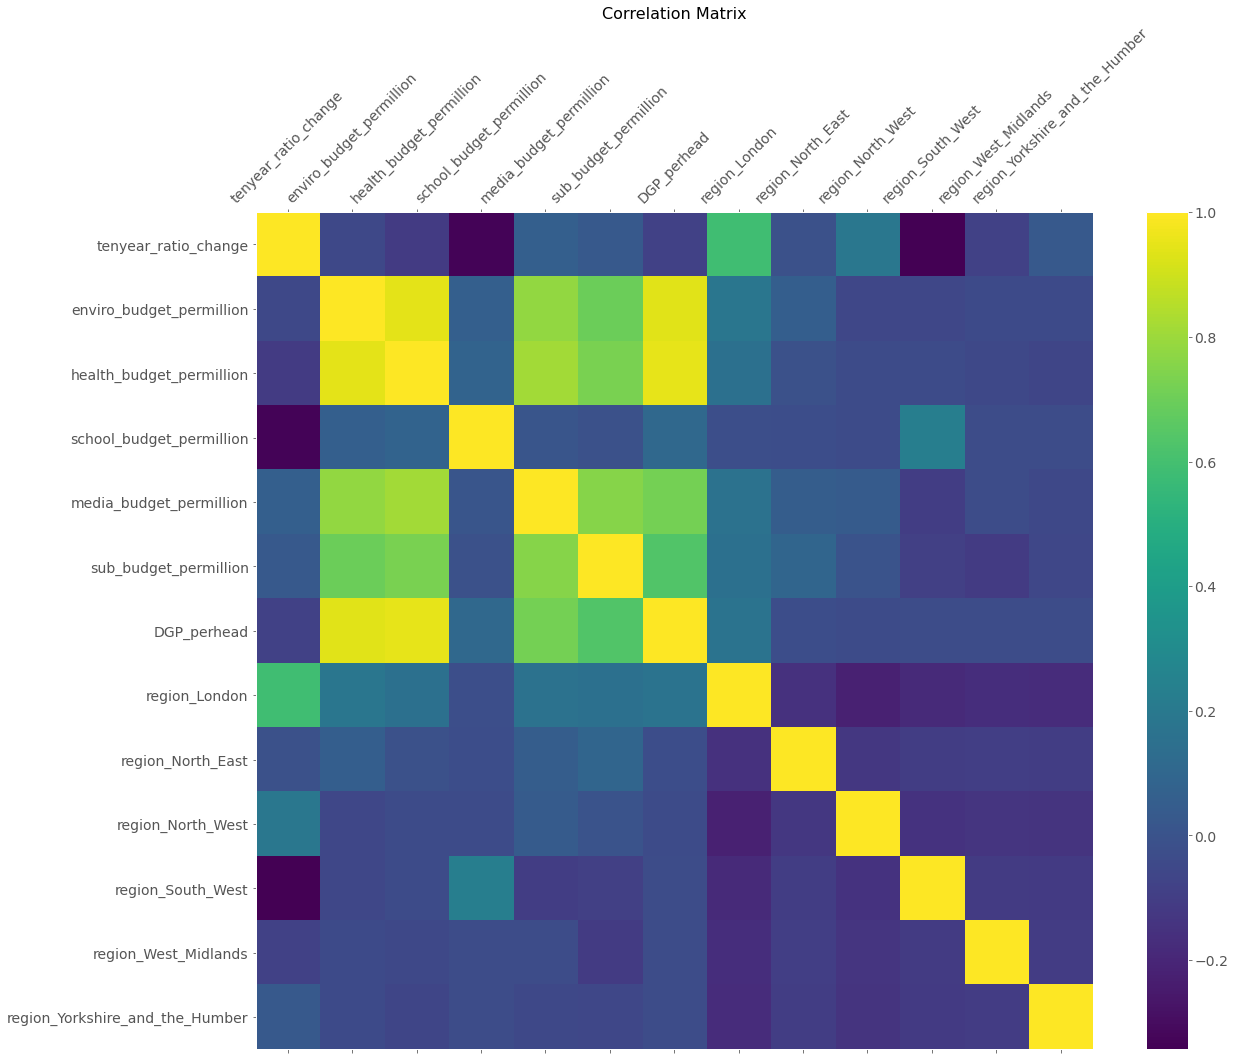

In [25]:
# 3.ten years ratio change
obesity_tenyear = pd.read_csv('D:/CASA0007-qm/assignment/gdp_region_budget.csv',low_memory=False)
obesity_tenyear.info()
obesity_tenyear.head()

obesity_tenyear_numeric = pd.get_dummies(obesity_tenyear)
obesity_tenyear_numeric.info()

obesity_ratio_final = obesity_tenyear_numeric.drop(['region_East_Around_London','air_budget_permillion'], axis=1)

# double check the result
obesity_ratio_final.info()

df = obesity_ratio_final
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [31]:
obesity_ratiochange =obesity_tenyear_numeric.loc[:,['tenyear_ratio_change','DGP_perhead','region_East_Around_London','region_London','region_North_East','region_North_West', 'region_South_West', 'region_West_Midlands', 'region_Yorkshire_and_the_Humber','air_budget_permillion','enviro_budget_permillion','health_budget_permillion','school_budget_permillion','media_budget_permillion','sub_budget_permillion']]
obesity_ratiochange.columns

# using VIF on the bike_rental dataset
df_predictors_selected_VIF = drop_column_using_vif_(obesity_ratiochange.drop('tenyear_ratio_change', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

model_obesiy_tenyear = sm.OLS(endog=obesity_ratiochange[['tenyear_ratio_change']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_obesiy_tenyear.summary()

Dropping: region_East_Around_London
Dropping: health_budget_permillion
Dropping: air_budget_permillion
Dropping: enviro_budget_permillion
The columns remaining after VIF selection are:
Index(['DGP_perhead', 'region_London', 'region_North_East',
       'region_North_West', 'region_South_West', 'region_West_Midlands',
       'region_Yorkshire_and_the_Humber', 'school_budget_permillion',
       'media_budget_permillion', 'sub_budget_permillion'],
      dtype='object')


C:\Users\79263\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\79263\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     tenyear_ratio_change   R-squared:                       0.649
Model:                              OLS   Adj. R-squared:                  0.624
Method:                   Least Squares   F-statistic:                     26.04
Date:                  Sun, 14 Nov 2021   Prob (F-statistic):           2.02e-27
Time:                          12:39:21   Log-Likelihood:                 1123.8
No. Observations:                   152   AIC:                            -2226.
Df Residuals:                       141   BIC:                            -2192.
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0002   3.12e-05      4.967      0.000    9.32e-05       0.000
DGP_perhead                     -8.497e-11   2.97e-11     -2.860      0.005   -1.44e-10   -2.62e-11
region_London                       0.0005    3.7e-05     12.911      0.000       0.000       0.001
region_North_East                   0.0002   5.15e-05      3.278      0.001    6.71e-05       0.000
region_North_West                   0.0003    4.1e-05      7.049      0.000       0.000       0.000
region_South_West               -1.729e-05    4.7e-05     -0.368      0.714      -0.000    7.57e-05
region_West_Midlands                0.0001   4.86e-05      2.345      0.020    1.79e-05       0.000
region_Yorkshire_and_the_Humber     0.0002    4.7e-05      4.373      0.000       0.000       0.000
school_budget_permillion        -1.909e-06   3.92e-07     -4.869      0.000   -2.68e-06   -1.13e-06
media_budget_permillion          5.007e-05   4.41e-05      1.136      0.258   -3.71e-05       0.000
sub_budget_permillion           -1.826e-05   7.24e-05     -0.252      0.801      -0.000       0.000
==============================================================================
Omnibus:                        4.940   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.989
Skew:                          -0.276   Prob(JB):                       0.0826
Kurtosis:                       3.695   Cond. No.                     4.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

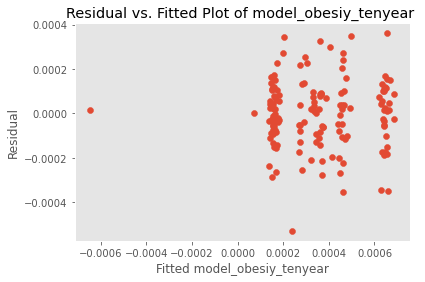

In [32]:
# plot 
plt.scatter(model_obesiy_tenyear.fittedvalues, model_obesiy_tenyear.resid)
# adding title and labels
plt.xlabel('Fitted model_obesiy_tenyear')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of model_obesiy_tenyear ')
plt.show()

In [ ]:
#so the former_five year model is best.